# CUSTOMER ANALYTICS

In [1]:
import pandas as pd
customer_behaviour_df= pd.read_csv("C:\\Users\\shram\\Downloads\\QVI_purchase_behaviour.csv")
transaction_df=pd.read_excel("C:\\Users\\shram\\Downloads\\QVI_transaction_data.xlsx")

In [2]:
customer_behaviour_df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


# DATA EXPLORATION

In [3]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
customer_behaviour_df.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [5]:
transaction_df.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [6]:
customer_behaviour_df.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [7]:
transaction_df.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [8]:
customer_behaviour_df['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [9]:
customer_behaviour_df['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [10]:
customer_behaviour_df['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

In [11]:
transaction_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


# OUTLIER REMOVAL


In [12]:
transaction_df.loc[transaction_df['PROD_QTY'].idxmax()]

DATE                                         43331
STORE_NBR                                      226
LYLTY_CARD_NBR                              226000
TXN_ID                                      226201
PROD_NBR                                         4
PROD_NAME         Dorito Corn Chp     Supreme 380g
PROD_QTY                                       200
TOT_SALES                                    650.0
Name: 69762, dtype: object

In [13]:
transaction_df=transaction_df.drop(transaction_df[transaction_df['PROD_QTY']==200].index)

In [14]:
transaction_df['Price_per']=transaction_df['TOT_SALES']/transaction_df['PROD_QTY']
transaction_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Price_per
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,3.00
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2.10
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,1.45
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,3.00
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,4.60
...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,5.40
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,4.40
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,4.40
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,3.90


In [15]:
# Get the list of columns
cols = list(transaction_df.columns)

# Swap the last and second-to-last columns
cols[-1], cols[-2] = cols[-2], cols[-1]
transaction_df = transaction_df[cols]

In [16]:
transaction_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,Price_per,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,3.00,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,2.10,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,1.45,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,3.00,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,4.60,13.8
...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,5.40,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.40,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,4.40,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,3.90,7.8


In [17]:
transaction_df['Price_per'].unique()

array([3.  , 2.1 , 1.45, 4.6 , 5.1 , 5.7 , 3.6 , 3.9 , 4.6 , 1.7 , 3.3 ,
       2.3 , 3.8 , 5.4 , 2.7 , 3.7 , 4.4 , 2.6 , 3.25, 2.9 , 3.1 , 4.2 ,
       4.3 , 1.5 , 1.9 , 5.9 , 4.4 , 2.8 , 1.8 , 1.9 , 6.5 , 2.4 , 3.8 ,
       3.3 , 5.4 , 2.7 , 5.1 , 3.7 , 1.85, 1.35, 5.9 , 1.44, 2.8 , 1.84,
       2.16, 1.65, 1.32, 2.2 , 2.3 , 1.48, 2.55, 2.04])

# PRODUCT SALES BY THE PARTICULAR CHIP

In [18]:
Prod_sales_df = transaction_df.groupby('PROD_NAME').agg({
    'PROD_QTY': 'sum',    # Sum of product quantity
    'Price_per': 'first',
    'TOT_SALES': 'sum',   # Sum of total sales
    'STORE_NBR': 'first', # Example to retain the first store number in the group
}).reset_index()
Prod_sales_df

,PROD_NAME,PROD_QTY,Price_per,TOT_SALES,STORE_NBR
0,Burger Rings 220g,2970,2.3,6831.0,20
1,CCs Nacho Cheese 175g,2839,2.1,5961.9,1
2,CCs Original 175g,2880,2.1,6048.0,20
3,CCs Tasty Cheese 175g,2890,2.1,6069.0,222
4,Cheetos Chs & Bacon Balls 190g,2801,3.3,9243.3,2
...,...,...,...,...,...
109,WW Sour Cream &OnionStacked Chips 160g,2802,1.9,5323.8,10
110,WW Supreme Cheese Corn Chips 200g,2837,1.9,5390.3,248
111,Woolworths Cheese Rings 190g,2872,1.8,5169.6,223
112,Woolworths Medium Salsa 300g,2700,1.5,4050.0,214


In [19]:
Prod_sales_df.describe()

,PROD_QTY,Price_per,TOT_SALES,STORE_NBR
count,114.000000,114.000000,114.000000,114.000000
mean,4427.403509,3.450877,16957.149123,78.289474
std,1636.605037,1.116331,10409.910926,72.628126
min,2643.000000,1.450000,4050.000000,1.000000
25%,2794.000000,2.700000,7602.575000,19.250000
50%,4418.500000,3.300000,14409.450000,55.000000
75%,6037.000000,4.375000,26208.600000,118.750000
max,6381.000000,5.900000,39052.000000,271.000000


In [20]:
max_qty_row = Prod_sales_df.loc[[Prod_sales_df['PROD_QTY'].idxmax()]]
max_qty_row

,PROD_NAME,PROD_QTY,Price_per,TOT_SALES,STORE_NBR
33,Kettle Mozzarella Basil & Pesto 175g,6381,5.4,34457.4,58


In [21]:
min_qty_row = Prod_sales_df.loc[[Prod_sales_df['PROD_QTY'].idxmin()]]
min_qty_row

,PROD_NAME,PROD_QTY,Price_per,TOT_SALES,STORE_NBR
21,French Fries Potato Chips 175g,2643,3.0,7929.0,115


In [22]:
max_sales_row = Prod_sales_df.loc[[Prod_sales_df['TOT_SALES'].idxmax()]]
max_sales_row

,PROD_NAME,PROD_QTY,Price_per,TOT_SALES,STORE_NBR
11,Dorito Corn Chp Supreme 380g,6109,3.25,39052.0,55


In [23]:
min_sales_row = Prod_sales_df.loc[[Prod_sales_df['TOT_SALES'].idxmin()]]
min_sales_row

,PROD_NAME,PROD_QTY,Price_per,TOT_SALES,STORE_NBR
112,Woolworths Medium Salsa 300g,2700,1.5,4050.0,214


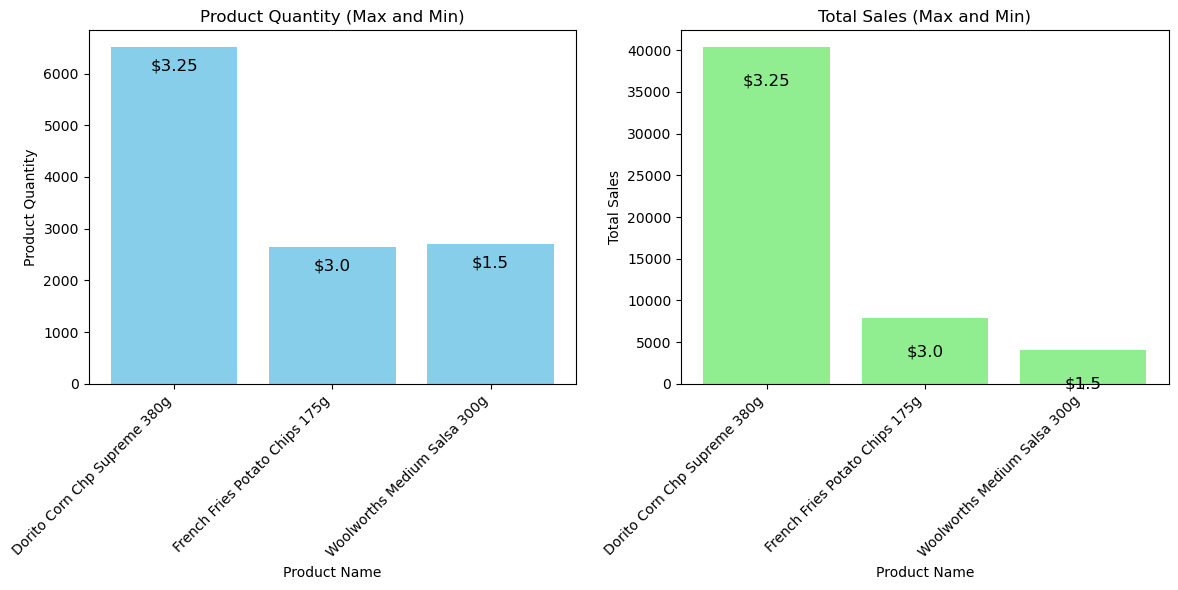

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Data (Max and Min examples)
products = ['Dorito Corn Chp Supreme 380g', 'French Fries Potato Chips 175g', 'Woolworths Medium Salsa 300g']
prod_qty = [6509, 2643, 2700]  # Product Quantity
tot_sales = [40352.0, 7929.0, 4050.0]  # Total Sales
price_per = [3.25, 3.0, 1.5]  # Price per product

# Create subplots: 1 row, 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart for Product Quantity
x_pos = np.arange(len(products))
bars1 = ax1.bar(x_pos, prod_qty, color='skyblue')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Product Quantity')
ax1.set_title('Product Quantity (Max and Min)')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(products, rotation=45, ha="right")

# Annotate with price inside bars for product quantity
for i, bar in enumerate(bars1):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 500, f'${price_per[i]}', 
             ha='center', va='bottom', color='black', fontsize=12)

# Bar chart for Total Sales
bars2 = ax2.bar(x_pos, tot_sales, color='lightgreen')
ax2.set_xlabel('Product Name')
ax2.set_ylabel('Total Sales')
ax2.set_title('Total Sales (Max and Min)')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(products, rotation=45, ha="right")

# Annotate with price inside bars for total sales
for i, bar in enumerate(bars2):
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5000, f'${price_per[i]}', 
             ha='center', va='bottom', color='black', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [25]:
# Top 5 total sales
top_5_sales = Prod_sales_df.nlargest(5, 'TOT_SALES')

# Bottom 5 total sales
bottom_5_sales = Prod_sales_df.nsmallest(5, 'TOT_SALES')

In [26]:
top_5_sales

,PROD_NAME,PROD_QTY,Price_per,TOT_SALES,STORE_NBR
11,Dorito Corn Chp Supreme 380g,6109,3.25,39052.0,55
86,Smiths Crnkle Chip Orgnl Big Bag 380g,6164,5.90,36367.6,130
77,Smiths Crinkle Chips Salt & Vinegar 330g,6106,5.70,34804.2,4
33,Kettle Mozzarella Basil & Pesto 175g,6381,5.40,34457.4,58
76,Smiths Crinkle Original 330g,6018,5.70,34302.6,25


In [27]:
bottom_5_sales

,PROD_NAME,PROD_QTY,Price_per,TOT_SALES,STORE_NBR
112,Woolworths Medium Salsa 300g,2700,1.5,4050.0,214
113,Woolworths Mild Salsa 300g,2823,1.5,4234.5,97
105,WW Crinkle Cut Original 175g,2666,1.7,4532.2,197
90,Sunbites Whlegrn Crisps Frch/Onin 90g,2706,1.7,4600.2,5
104,WW Crinkle Cut Chicken 175g,2766,1.7,4702.2,13


In [28]:
transaction_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,Price_per,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,3.00,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,2.10,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,1.45,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,3.00,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,4.60,13.8
...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,5.40,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.40,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,4.40,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,3.90,7.8


In [29]:
transaction_df['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [30]:
transaction_df['Weight_in_gr'] = transaction_df['PROD_NAME'].str.extract(r'(\d+)')

C:\Users\shram\AppData\Local\Temp\ipykernel_51400\3957666737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_df['Weight_in_gr'] = transaction_df['PROD_NAME'].str.extract(r'(\d+)')


In [31]:
transaction_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,Price_per,TOT_SALES,Weight_in_gr
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,3.00,6.0,175
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,2.10,6.3,175
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,1.45,2.9,170
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,3.00,15.0,175
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,4.60,13.8,150
...,...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,5.40,10.8,175
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.40,4.4,175
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,4.40,8.8,170
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,3.90,7.8,150


# SALES ANALYTICS BY BRANDS

In [32]:
brands = [
    "Natural Chip", "CCs", "Smiths","Kettle", "Old El Paso", "Grain Waves", "Doritos", "Twisties", "WW", "Thins",
    "Burger Rings", "NCC", "Cheezels", "Infzns", "Red Rock Deli", "Pringles", "Cobs Popd", "Woolworths", "French Fries",
    "Tyrrells", "Tostitos", "Cheetos", "Sunbites", "Snbts", "Infuzions", "RRD"
]
brand_variations = {
    "Smith": "Smiths",
    "Natural Chips": "Natural Chip",
    "CC's": "CCs",
    "Dorito":'Doritos',
    'GrnWves':"Grain Waves"
}


def extract_brand(name):
    name_lower = name.lower()
     # Step 1: Check for variations in brand_variations
    for variation, canonical_brand in brand_variations.items():
        if variation.lower() in name_lower:
            return canonical_brand
        
    for brand in brands:
        if brand.lower() in name.lower():
            return brand
transaction_df['Brand']= transaction_df['PROD_NAME'].apply(extract_brand) 

C:\Users\shram\AppData\Local\Temp\ipykernel_51400\3710160828.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_df['Brand']= transaction_df['PROD_NAME'].apply(extract_brand)


In [33]:
brand_sales_df = transaction_df.groupby('Brand').agg({
    'TOT_SALES': 'sum',  # Sum of total sales for each brand
    'PROD_QTY': 'sum'    # Sum of product quantity for each brand
}).reset_index()

In [36]:
brand_sales_df.to_excel('brand_sales_df.xlsx')

In [33]:
brand_sales_df.sort_values(by='PROD_QTY',ascending=False)

,Brand,TOT_SALES,PROD_QTY
10,Kettle,390239.8,79051
17,Smiths,224660.2,60339
5,Doritos,240590.9,53816
14,Pringles,177655.5,48019
20,Thins,88852.5,26929
15,RRD,64954.5,22500
8,Infuzions,76247.6,21119
24,WW,35889.5,19461
4,Cobs Popd,70569.8,18571
21,Tostitos,79789.6,18134


In [34]:
brand_sales_df.loc[brand_sales_df['TOT_SALES'].idxmin()]

Brand        Sunbites
TOT_SALES      4600.2
PROD_QTY         2706
Name: 19, dtype: object

In [35]:
brand_sales_df.loc[brand_sales_df['TOT_SALES'].idxmax()]

Brand          Kettle
TOT_SALES    390239.8
PROD_QTY        79051
Name: 10, dtype: object

In [36]:
brand_sales_df['TOT_SALES'].sum()

1933115.0

In [37]:
brand_sales_df.loc[brand_sales_df['PROD_QTY'].idxmax()]

Brand          Kettle
TOT_SALES    390239.8
PROD_QTY        79051
Name: 10, dtype: object

In [38]:
brand_sales_df.loc[brand_sales_df['PROD_QTY'].idxmin()]

Brand        French Fries
TOT_SALES          7929.0
PROD_QTY             2643
Name: 6, dtype: object

In [63]:
transaction_df['Weight_in_gr'].unique()

array(['175', '170', '150', '300', '330', '210', '270', '220', '125',
       '110', '134', '380', '180', '165', '135', '250', '200', '160',
       '190', '90', '70'], dtype=object)

In [46]:
customer_behaviour_df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [47]:
transaction_df['LYLTY_CARD_NBR'].duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
264831     True
264832    False
264833    False
264834     True
264835    False
Name: LYLTY_CARD_NBR, Length: 264834, dtype: bool

In [48]:
transaction_df.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
Price_per         0
TOT_SALES         0
Weight_in_gr      0
Brand             0
dtype: int64

In [49]:
rows_with_nan = transaction_df[transaction_df.isna().any(axis=1)]
rows_with_nan['PROD_NAME'].unique()

array([], dtype=object)

# COMBINING BOTH TABLES

In [37]:
combined_df= pd.merge(transaction_df,customer_behaviour_df,on='LYLTY_CARD_NBR',how='outer')
combined_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,Price_per,TOT_SALES,Weight_in_gr,Brand,LIFESTAGE,PREMIUM_CUSTOMER
0,43390.0,1.0,1000,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,3.00,6.0,175,Natural Chip,YOUNG SINGLES/COUPLES,Premium
1,43599.0,1.0,1307,348.0,66.0,CCs Nacho Cheese 175g,3.0,2.10,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,43414.0,1.0,1307,346.0,96.0,WW Original Stacked Chips 160g,2.0,1.90,3.8,160,WW,MIDAGE SINGLES/COUPLES,Budget
3,43533.0,1.0,1307,347.0,54.0,CCs Original 175g,1.0,2.10,2.1,175,CCs,MIDAGE SINGLES/COUPLES,Budget
4,43605.0,1.0,1343,383.0,61.0,Smiths Crinkle Cut Chips Chicken 170g,2.0,1.45,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264830,43325.0,272.0,272358,270154.0,74.0,Tostitos Splash Of Lime 175g,1.0,4.40,4.4,175,Tostitos,YOUNG SINGLES/COUPLES,Premium
264831,43410.0,272.0,272379,270187.0,51.0,Doritos Mexicana 170g,2.0,4.40,8.8,170,Doritos,YOUNG SINGLES/COUPLES,Premium
264832,43461.0,272.0,272379,270188.0,42.0,Doritos Corn Chip Mexican Jalapeno 150g,2.0,3.90,7.8,150,Doritos,YOUNG SINGLES/COUPLES,Premium
264833,43365.0,272.0,272380,270189.0,74.0,Tostitos Splash Of Lime 175g,2.0,4.40,8.8,175,Tostitos,YOUNG SINGLES/COUPLES,Premium


# SALES ANALYTICS BY CUSTOMER SEGMENTS

In [38]:
combined_df.isna().sum()

DATE                1
STORE_NBR           1
LYLTY_CARD_NBR      0
TXN_ID              1
PROD_NBR            1
PROD_NAME           1
PROD_QTY            1
Price_per           1
TOT_SALES           1
Weight_in_gr        1
Brand               1
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [39]:
lifestage_choice_df= combined_df.groupby('LIFESTAGE').agg('TOT_SALES').sum().reset_index()
lifestage_choice_df

,LIFESTAGE,TOT_SALES
0,MIDAGE SINGLES/COUPLES,184751.30
1,NEW FAMILIES,50433.45
2,OLDER FAMILIES,352467.20
3,OLDER SINGLES/COUPLES,402426.75
4,RETIREES,366470.90
5,YOUNG FAMILIES,316160.10
6,YOUNG SINGLES/COUPLES,260405.30


In [40]:
lifestage_choice_df.loc[lifestage_choice_df['TOT_SALES'].idxmax()]

LIFESTAGE    OLDER SINGLES/COUPLES
TOT_SALES                402426.75
Name: 3, dtype: object

In [41]:
lifestage_choice_df.loc[lifestage_choice_df['TOT_SALES'].idxmin()]

LIFESTAGE    NEW FAMILIES
TOT_SALES        50433.45
Name: 1, dtype: object

In [42]:
lifestage_chip_df= combined_df.groupby(['LIFESTAGE','Brand'])['PROD_QTY'].sum().reset_index()
lifestage_chip_df

,LIFESTAGE,Brand,PROD_QTY
0,MIDAGE SINGLES/COUPLES,Burger Rings,287.0
1,MIDAGE SINGLES/COUPLES,CCs,818.0
2,MIDAGE SINGLES/COUPLES,Cheetos,489.0
3,MIDAGE SINGLES/COUPLES,Cheezels,846.0
4,MIDAGE SINGLES/COUPLES,Cobs Popd,1841.0
...,...,...,...
177,YOUNG SINGLES/COUPLES,Tostitos,2534.0
178,YOUNG SINGLES/COUPLES,Twisties,2588.0
179,YOUNG SINGLES/COUPLES,Tyrrells,1765.0
180,YOUNG SINGLES/COUPLES,WW,2216.0


In [43]:
 lifestage_chip_df= lifestage_chip_df.sort_values(by=['LIFESTAGE', 'PROD_QTY'], ascending=False)
 lifestage_chip_df

,LIFESTAGE,Brand,PROD_QTY
166,YOUNG SINGLES/COUPLES,Kettle,10993.0
161,YOUNG SINGLES/COUPLES,Doritos,7438.0
173,YOUNG SINGLES/COUPLES,Smiths,7276.0
170,YOUNG SINGLES/COUPLES,Pringles,6837.0
176,YOUNG SINGLES/COUPLES,Thins,3650.0
...,...,...,...
0,MIDAGE SINGLES/COUPLES,Burger Rings,287.0
11,MIDAGE SINGLES/COUPLES,NCC,268.0
18,MIDAGE SINGLES/COUPLES,Snbts,251.0
19,MIDAGE SINGLES/COUPLES,Sunbites,219.0


In [44]:
top_5_by_lifestage =lifestage_chip_df.groupby('LIFESTAGE').head(5)

In [65]:
top_5_by_lifestage

,LIFESTAGE,Brand,PROD_QTY
166,YOUNG SINGLES/COUPLES,Kettle,10993.0
161,YOUNG SINGLES/COUPLES,Doritos,7438.0
173,YOUNG SINGLES/COUPLES,Smiths,7276.0
170,YOUNG SINGLES/COUPLES,Pringles,6837.0
176,YOUNG SINGLES/COUPLES,Thins,3650.0
140,YOUNG FAMILIES,Kettle,12153.0
147,YOUNG FAMILIES,Smiths,11011.0
135,YOUNG FAMILIES,Doritos,8578.0
144,YOUNG FAMILIES,Pringles,7435.0
145,YOUNG FAMILIES,RRD,4564.0


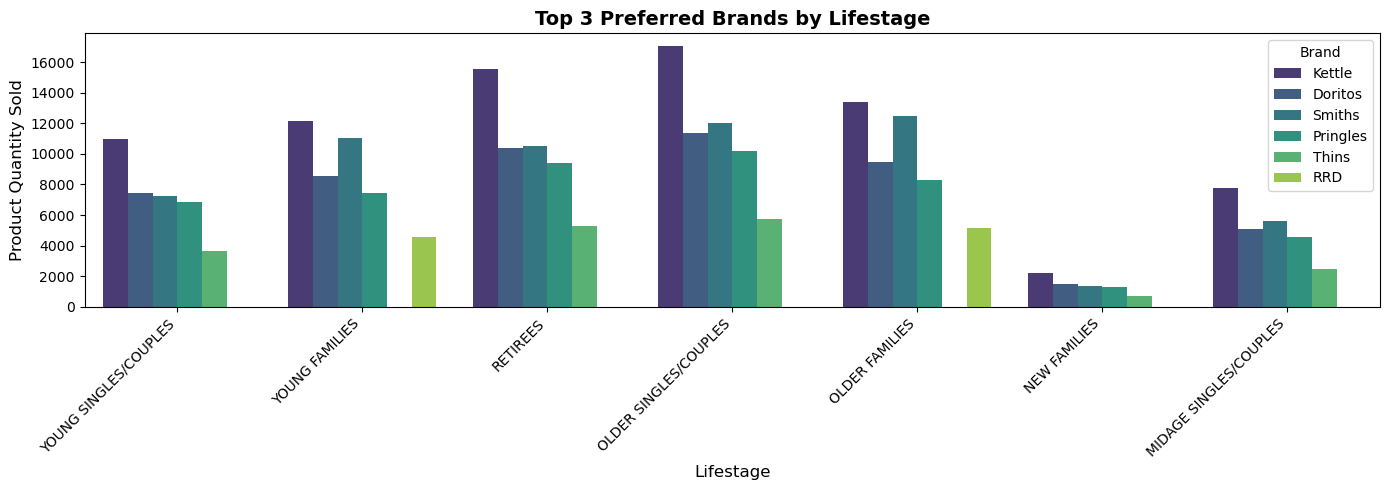

In [67]:
import seaborn as sns
%matplotlib inline
# Create a bar plot
plt.figure(figsize=(14, 5))  # Ensure the figure fits well in Jupyter
sns.barplot(data=top_5_by_lifestage, x="LIFESTAGE", y="PROD_QTY", hue="Brand", palette="viridis")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Add labels and title
plt.xlabel("Lifestage", fontsize=12)
plt.ylabel("Product Quantity Sold", fontsize=12)
plt.title("Top 3 Preferred Brands by Lifestage", fontsize=14, fontweight="bold")

# Display legend
plt.legend(title="Brand")

# Show the plot
plt.tight_layout()  # Adjust layout to fit within Jupyter output
plt.show()

In [59]:
premium_choice_df= combined_df.groupby('PREMIUM_CUSTOMER').agg('TOT_SALES').sum().reset_index()
premium_choice_df

,PREMIUM_CUSTOMER,TOT_SALES
0,Budget,676211.55
1,Mainstream,750744.50
2,Premium,506158.95


In [60]:
prem_cus_chip_df= combined_df.groupby(['PREMIUM_CUSTOMER','Brand'])['PROD_QTY'].sum().reset_index()
prem_cus_chip_df

,PREMIUM_CUSTOMER,Brand,PROD_QTY
0,Budget,Burger Rings,1099.0
1,Budget,CCs,3170.0
2,Budget,Cheetos,1987.0
3,Budget,Cheezels,3095.0
4,Budget,Cobs Popd,6258.0
...,...,...,...
73,Premium,Tostitos,4802.0
74,Premium,Twisties,4696.0
75,Premium,Tyrrells,3185.0
76,Premium,WW,5370.0


In [61]:
prem_cus_chip_df= prem_cus_chip_df.sort_values(by=['PREMIUM_CUSTOMER', 'PROD_QTY'], ascending=False)
prem_cus_chip_df

,PREMIUM_CUSTOMER,Brand,PROD_QTY
62,Premium,Kettle,20517.0
69,Premium,Smiths,16009.0
57,Premium,Doritos,13608.0
66,Premium,Pringles,12617.0
72,Premium,Thins,7109.0
...,...,...,...
18,Budget,Snbts,1143.0
0,Budget,Burger Rings,1099.0
11,Budget,NCC,1025.0
19,Budget,Sunbites,1015.0


In [62]:
top_5_by_prem_cus =prem_cus_chip_df.groupby('PREMIUM_CUSTOMER').head(5)
top_5_by_prem_cus

,PREMIUM_CUSTOMER,Brand,PROD_QTY
62,Premium,Kettle,20517.0
69,Premium,Smiths,16009.0
57,Premium,Doritos,13608.0
66,Premium,Pringles,12617.0
72,Premium,Thins,7109.0
36,Mainstream,Kettle,31334.0
43,Mainstream,Smiths,22366.0
31,Mainstream,Doritos,21357.0
40,Mainstream,Pringles,18861.0
46,Mainstream,Thins,10402.0
